<h1>Unsupervised Learning</h1>
<ul>
    <li>K-means</li>
    <li>Hierarchical Clustering</li>
    <li>GMM</li>
    <li>DBScan</li>
    
</ul>

<h1>Dataset</h1>
<ul>
    <li>Wine Dataset</li>
</ul>

In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine()

<h2>Wine Dataset</h2>

In [2]:
print (wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
print (wine_data.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


<h2>Types of Input Data</h2>
<ul>
    <li>One Mode Matrix</li>
    <li>Two Mode Matrix</li>
</ul>

<h2>Dissimilarity Matrix ( One mode matrix)</h2>
<ul>
<li>object by object</li>
<li> n * n matrix</li>    
</ul>

How do we transform two mode data into one mode data<br>

<p>L1 (manhattan) $|x_{1}-x_{2}|+|y_{1}-y_{2}|.$</p>

<p>L2 (euclidean) $\sqrt{(x_{1}-x_{2})^{2}+(y_{1}-y_{2})^{2}}.$</p>

<p>cosine $\frac {x \cdot y}{||x|| \cdot ||y||}$</p>

<p style="color:red">we can use sklearn.metrics.pairwise</p>

In [4]:
from sklearn.metrics import pairwise
#manhattan
one_mode_L1_data = pairwise.manhattan_distances(load_wine().data,load_wine().data)
#euclidean
one_mode_L2_data = pairwise.euclidean_distances(load_wine().data,load_wine().data)




In [5]:
print (one_mode_L1_data.shape)
print (one_mode_L1_data[0])
print (one_mode_L2_data[0])

(178, 178)
[  0.        51.06     152.48     435.09     349.97     403.87
 259.26     241.56      54.48      53.04     471.74     252.49
 296.08     129.02     515.66     266.56     229.28      85.71
 641.3      235.56     287.61     329.54      60.71      89.69
 260.06     253.69     168.32     260.71     177.45      64.34
 255.79     478.21     104.59     182.82      55.72     179.39
 207.33      77.48      80.85     312.36     283.2       77.42
  59.67     417.98     204.82      39.34      29.47     109.1
  34.75     221.24     128.46     236.5      147.38     327.33
  17.66      73.86     107.04     235.15     244.87     603.68
 423.84     652.4      478.99     694.78     747.26     424.89
 616.64     615.4      343.78     382.38     235.544    710.39
 648.89     111.9      218.98     678.34     722.51     594.95
 334.42     644.16     841.19     401.35     503.41     608.91
 589.01     654.42     624.9      562.68     444.38     515.42
 644.86     672.2      632.51     825.38     

<h2>Data Matrix (Two mode Matrix)</h2>
    <li>n objects with p attributes</li>
    <li>n * p matrix</li>


In [6]:
two_mode_data = load_wine().data
print (two_mode_data)
print (two_mode_data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)


<h2>K-Means</h2>
<ul>
    <li>sklearn.cluster.Kmeans</li>
    <li>input
    <ul>
        <li>k clusters</li>
        <li>data (n object with p attribute)</li>
    </ul>
</ul>

n_clusters<br>
&nbsp;&nbsp;&nbsp;the number of clusters to form as well as the number of centroids to generate<br>
random_state

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
kmeans_data = MinMaxScaler().fit_transform(two_mode_data)
kmeans = KMeans(n_clusters=3, random_state=0).fit(kmeans_data)
print (kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
result = model.fit_transform(kmeans_data)
print (result)

[[-9.41307545e+00 -5.36982441e+00]
 [-5.27640247e+00 -5.49918079e+00]
 [-7.33208895e+00 -8.36583614e+00]
 [-9.86803055e+00 -8.85849667e+00]
 [-2.71293235e+00 -8.07800102e+00]
 [-8.74751949e+00 -9.56701660e+00]
 [-6.87087154e+00 -6.61375618e+00]
 [-6.07435513e+00 -6.53456926e+00]
 [-7.68953991e+00 -7.03216743e+00]
 [-8.51977444e+00 -6.58942795e+00]
 [-7.97146225e+00 -9.49195194e+00]
 [-5.53940439e+00 -6.96382809e+00]
 [-6.14226818e+00 -7.58807802e+00]
 [-9.94132137e+00 -1.05815887e+01]
 [-9.56696224e+00 -1.01469898e+01]
 [-5.87846708e+00 -9.06414223e+00]
 [-6.34167147e+00 -9.82225227e+00]
 [-5.71603203e+00 -9.83495331e+00]
 [-8.52365685e+00 -1.03194447e+01]
 [-7.94164467e+00 -3.64376426e+00]
 [-9.13688850e+00 -5.25335646e+00]
 [-6.13593769e+00 -2.62695193e+00]
 [-6.45533419e+00 -5.23342800e+00]
 [-5.27841616e+00 -4.71946764e+00]
 [-5.62069654e+00 -4.52530670e+00]
 [-2.25526690e+00 -8.29965019e+00]
 [-5.51274776e+00 -7.56508780e+00]
 [-4.55233908e+00 -6.10934210e+00]
 [-3.93887067e+00 -8

In [9]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size
        



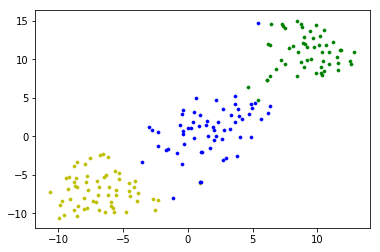

In [10]:
result_0 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
result_1 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
result_2 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_kmeans = plt

<h2>Hierarchical Clustering</h2>
<ul>
    <li>sklearn.cluster.AgglomerativeClustering</li>
    <li>input</li>
    <ul>
        <li>data (n objects by n objects)</li>
    </ul>
</ul>

n_clusters<br>
&nbsp;&nbsp;&nbsp;The number of clusters to find<br>
affinity<br>
&nbsp;&nbsp;&nbsp;Can be 'euclidean'(default), 'l1', 'l2', 'manhattan', 'cosine' or 'precomputed'<br>
linkage<br>
&nbsp;&nbsp;&nbsp;'ward', 'complete', 'average'
<p style="color:red">If linkage is “ward”, only “euclidean” is accepted</p>

In [11]:
from sklearn.cluster import AgglomerativeClustering

L2_hierarchical_1 = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l2').fit(two_mode_data)
L2_hierarchical_2 = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity='precomputed').fit(one_mode_L2_data)
print (L2_hierarchical_1.labels_)
print (L2_hierarchical_2.labels_)

[2 2 2 1 0 1 5 5 2 2 1 5 5 2 1 5 5 2 1 0 0 0 2 2 0 0 2 5 0 2 5 1 0 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 0 2 5 2 5 2 5 2 2 0 5 5 3 0 3 3 4 4 0 3 3 0 0 0 4 3 0
 0 4 4 3 0 3 4 0 3 3 3 3 3 3 0 3 3 3 3 4 4 0 3 4 0 4 0 3 4 4 0 4 3 3 4 0 3
 4 3 4 4 4 3 4 4 3 3 3 4 4 4 4 4 3 4 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 0 4 3
 0 3 3 3 4 0 3 0 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3]
[2 2 2 1 0 1 5 5 2 2 1 5 5 2 1 5 5 2 1 0 0 0 2 2 0 0 2 5 0 2 5 1 0 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 0 2 5 2 5 2 5 2 2 0 5 5 3 0 3 3 4 4 0 3 3 0 0 0 4 3 0
 0 4 4 3 0 3 4 0 3 3 3 3 3 3 0 3 3 3 3 4 4 0 3 4 0 4 0 3 4 4 0 4 3 3 4 0 3
 4 3 4 4 4 3 4 4 3 3 3 4 4 4 4 4 3 4 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 0 4 3
 0 3 3 3 4 0 3 0 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3]


In [12]:
from sklearn.preprocessing import MinMaxScaler
hierarchical_data = MinMaxScaler().fit_transform(two_mode_data)
hierarchical_example = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(hierarchical_data)

In [13]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
result = model.fit_transform(hierarchical_data)
print (result)

[[-9.41307545e+00 -5.36982441e+00]
 [-5.27640247e+00 -5.49918079e+00]
 [-7.33208895e+00 -8.36583614e+00]
 [-9.86803055e+00 -8.85849667e+00]
 [-2.71293235e+00 -8.07800102e+00]
 [-8.74751949e+00 -9.56701660e+00]
 [-6.87087154e+00 -6.61375618e+00]
 [-6.07435513e+00 -6.53456926e+00]
 [-7.68953991e+00 -7.03216743e+00]
 [-8.51977444e+00 -6.58942795e+00]
 [-7.97146225e+00 -9.49195194e+00]
 [-5.53940439e+00 -6.96382809e+00]
 [-6.14226818e+00 -7.58807802e+00]
 [-9.94132137e+00 -1.05815887e+01]
 [-9.56696224e+00 -1.01469898e+01]
 [-5.87846708e+00 -9.06414223e+00]
 [-6.34167147e+00 -9.82225227e+00]
 [-5.71603203e+00 -9.83495331e+00]
 [-8.52365685e+00 -1.03194447e+01]
 [-7.94164467e+00 -3.64376426e+00]
 [-9.13688850e+00 -5.25335646e+00]
 [-6.13593769e+00 -2.62695193e+00]
 [-6.45533419e+00 -5.23342800e+00]
 [-5.27841616e+00 -4.71946764e+00]
 [-5.62069654e+00 -4.52530670e+00]
 [-2.25526690e+00 -8.29965019e+00]
 [-5.51274776e+00 -7.56508780e+00]
 [-4.55233908e+00 -6.10934210e+00]
 [-3.93887067e+00 -8

In [14]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size

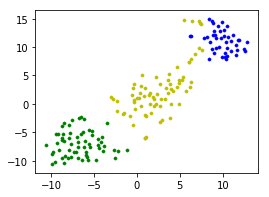

In [15]:
result_0 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 0])
result_1 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 1])
result_2 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_hierarchical = plt

<h2>Gaussian Mixture Model</h2>
<ul>
<li>sklearn.mixture.GaussianMixture
<li>input
    <ul>
        <li>k clusters
        <li>data (n object with p attributes)</li>
    </ul>
</ul>

n_components<br>
&nbsp;&nbsp;&nbsp;The number of mixture components<br>
covariance_type<br>
&nbsp;&nbsp;&nbsp;‘full’, ‘tied’, ‘diag’, ‘spherical’<br> 
random_state<br>

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

gmm_data = MinMaxScaler().fit_transform(two_mode_data)
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(gmm_data)
gmm_labels = gmm.predict(gmm_data)
print (gmm_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 2 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
result = model.fit_transform(gmm_data)
print (result)

[[-9.41307545e+00 -5.36982441e+00]
 [-5.27640247e+00 -5.49918079e+00]
 [-7.33208895e+00 -8.36583614e+00]
 [-9.86803055e+00 -8.85849667e+00]
 [-2.71293235e+00 -8.07800102e+00]
 [-8.74751949e+00 -9.56701660e+00]
 [-6.87087154e+00 -6.61375618e+00]
 [-6.07435513e+00 -6.53456926e+00]
 [-7.68953991e+00 -7.03216743e+00]
 [-8.51977444e+00 -6.58942795e+00]
 [-7.97146225e+00 -9.49195194e+00]
 [-5.53940439e+00 -6.96382809e+00]
 [-6.14226818e+00 -7.58807802e+00]
 [-9.94132137e+00 -1.05815887e+01]
 [-9.56696224e+00 -1.01469898e+01]
 [-5.87846708e+00 -9.06414223e+00]
 [-6.34167147e+00 -9.82225227e+00]
 [-5.71603203e+00 -9.83495331e+00]
 [-8.52365685e+00 -1.03194447e+01]
 [-7.94164467e+00 -3.64376426e+00]
 [-9.13688850e+00 -5.25335646e+00]
 [-6.13593769e+00 -2.62695193e+00]
 [-6.45533419e+00 -5.23342800e+00]
 [-5.27841616e+00 -4.71946764e+00]
 [-5.62069654e+00 -4.52530670e+00]
 [-2.25526690e+00 -8.29965019e+00]
 [-5.51274776e+00 -7.56508780e+00]
 [-4.55233908e+00 -6.10934210e+00]
 [-3.93887067e+00 -8

In [18]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size

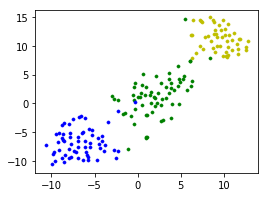

In [19]:
result_0 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 0])
result_1 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 1])
result_2 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_gmm = plt

<h2>DBScan</h2>
<ul>
<li>sklearn.cluster.DBSCAN
<li>input
    <ul>
        <li>Eps: Maximum radius of the neighborhood</li>
        <li>MinPts: Minimum number of points in an Eps-neighborhood of that point</li>
        <li>data (n object with p attributes)</li>
    </ul>
</ul>

eps<br>
&nbsp;&nbsp;&nbsp;The maximum distance between two samples for them to be considered as in the same neighborhood<br>
min_samples<br>
&nbsp;&nbsp;&nbsp;The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=30, min_samples=9)
dbscan.fit(two_mode_data)
dbscan_labels = dbscan.labels_
print (dbscan_labels)

[ 0  0 -1 -1 -1 -1  1  1  0  0 -1  1 -1 -1 -1  1  1 -1 -1  3 -1 -1  0  0
  3  3 -1  1 -1  0  1 -1 -1 -1 -1 -1  3 -1  0 -1 -1  0 -1  2 -1  0  0 -1
  0  1 -1  1 -1 -1  0 -1 -1  1  1  2  2  2  2  2  2  2  2  2 -1 -1  3  2
  2 -1 -1  2  2  2 -1  2 -1  2  2  2  2  2  2  2  2  2  2  2  2 -1  2 -1
  2  2  2  2  2  2  2  2  2 -1  2  2 -1  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2
  3  3  2  2  2  2  2  2  2  2  2 -1  2 -1  2  2  2  2  2  2  2  2  2  2
 -1  2  2  2  2 -1 -1  3  3  2]


In [21]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print (n_clusters)

4


In [22]:
for index in range(n_clusters):
    print (index, ":", dbscan_labels.tolist().count(index))
print ("outlier : ", dbscan_labels.tolist().count(-1))

0 : 13
1 : 11
2 : 99
3 : 9
outlier :  46


In [23]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
result = model.fit_transform(two_mode_data)
print (result)

[[-8.73002148e+00  8.44740868e+00]
 [-8.01413631e+00  8.78462029e+00]
 [-1.01411104e+01  1.01703463e+01]
 [-1.24425402e+01  1.18354988e+01]
 [-1.81299138e+00  3.16634464e+00]
 [-1.20997181e+01  1.19959126e+01]
 [-1.10910816e+01  1.13141079e+01]
 [-1.15556431e+01  1.08812113e+01]
 [-8.31432152e+00  8.22097206e+00]
 [-7.91068602e+00  8.71203041e+00]
 [-1.23915596e+01  1.21456814e+01]
 [-1.09168291e+01  1.12814350e+01]
 [-1.14251060e+01  1.14765406e+01]
 [-9.64652061e+00  9.78817081e+00]
 [-1.25723000e+01  1.21592045e+01]
 [-1.16195593e+01  1.10870199e+01]
 [-1.14215107e+01  1.07124863e+01]
 [-9.42252827e+00  9.47670460e+00]
 [-1.27867155e+01  1.23043528e+01]
 [-4.58416939e+00  5.09106159e+00]
 [-2.95875263e+00  4.08353233e+00]
 [-2.84811997e+00  3.64446902e+00]
 [-8.13758659e+00  8.06304932e+00]
 [-7.53393459e+00  8.19487190e+00]
 [-4.34581900e+00  5.42726231e+00]
 [-4.08307409e+00  4.93902445e+00]
 [-1.02450771e+01  1.03249321e+01]
 [-1.10073338e+01  1.13088322e+01]
 [-5.63084173e+00  6

In [24]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 8.0
fig_size[1] = 6
.0
plt.rcParams["figure.figsize"] = fig_size

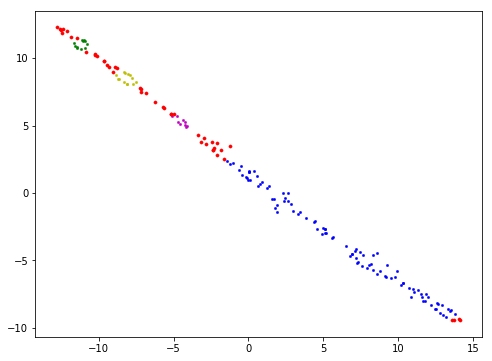

In [25]:
result_0 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 0])
result_1 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 1])
result_2 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 2])
result_3 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 3])
outlier = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == -1])


plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=5)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=5)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=5)
plt.scatter(result_3[:,0], result_3[:,1], c='m', linewidths=0.5, s=5)
plt.scatter(outlier[:,0], outlier[:,1], c='r', linewidths=0.5, s=10)
flg_gmm = plt